In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import special_ortho_group
import seaborn as sns
import pandas as pd

from sklearn.decomposition import PCA

# Goal 
To generate data (6 distinct groups) with trajectory in time

data_structure = [[n_1 data], [n_2 data]]

In [27]:
# c = number of class
# t = timepoints
# d = dimention of data
# a = amplitude

c = 2 
t = 100
d = 2
to_d = 10
a = 1

In [28]:
theta = np.linspace(0, 2*np.pi, c+1)
theta = theta[:-1]
theta


array([0.        , 3.14159265])

In [29]:
def find_coords(theta, class_num):
    x = a * np.cos(theta[class_num])
    y = a * np.sin(theta[class_num])
    return [0, 0]

def transformation_to_n_dim(data, from_d, to_d):
    new_data = np.zeros((data.shape[0], to_d, data.shape[2]))

    for i in range(data.shape[0]):
        for j in range(data.shape[2]):
            # print(data[i, :, j].shape)
            new_data[i, :, j] = np.hstack((data[i, :, j], np.zeros(to_d - from_d)))
    
    return new_data

def rotation(data, seed = 42, d = to_d):
    random_rotated = np.zeros((data.shape[0], to_d, data.shape[2]))
    random_rotation_matrix = special_ortho_group.rvs(to_d)
    for i in range(data.shape[0]):
        for j in range(data.shape[2]):
            random_rotated[i, :, j] = np.matmul(data[i, :, j], random_rotation_matrix)

    return random_rotated

def rotation_matrix(matrix, degree):
    deg = np.radians(degree)
    rotation_operation = np.array([[np.cos(deg), -np.sin(deg)], [np.sin(deg), np.cos(deg)]])
    product = rotation_operation @ matrix
    return product

In [30]:
data = np.zeros((c, d, t))



In [31]:
# Initial location
for i in range(c):
    data[i, :, 0] = find_coords(theta, i)
    print(find_coords(theta, i))    

[0, 0]
[0, 0]


In [32]:
for i in range(t):
    if i == 0:
        continue
    data[0, :, i] = rotation_matrix(data[0, :, i-1], 1)* 1.001 + np.random.normal(0, 0.01, (1, d))
    data[1, :, i] = rotation_matrix(data[1, :, i-1], -1)* 1.001 + np.random.normal(0, 0.01, (1, d))

Text(0.5, 0, 'Time')

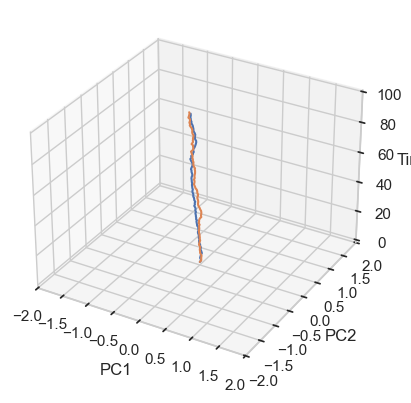

In [33]:
ax = plt.figure().add_subplot(projection='3d')

for i in range(c):
    ax.plot(data[i, 0, :], data[i, 1, :], range(t))

ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('Time')



In [34]:
new_data = transformation_to_n_dim(data, d, to_d)
new_data.shape

(2, 10, 100)

In [35]:
new_data[0, :, 2]

array([0.02093399, 0.00040374, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [36]:
rotated = rotation(new_data)

In [37]:
rotated.shape

(2, 10, 100)

In [38]:
rotated[0, :, 2]

array([ 9.05883884e-03, -1.64941077e-03, -1.15258078e-02,  3.46610094e-03,
        8.30946366e-03, -4.91800926e-06, -1.23328825e-03,  4.13411044e-03,
        1.09716602e-02, -8.46964669e-04])

Text(0.5, 0, 'Time')

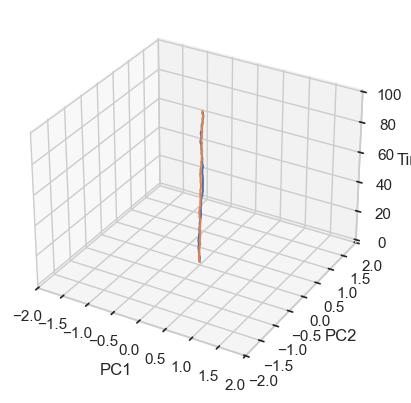

In [39]:
ax = plt.figure().add_subplot(projection='3d')

for i in range(c):
    ax.plot(rotated[i, 3, :], rotated[i, 2, :], range(t))

ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('Time')


Text(0.5, 0, 'Time')

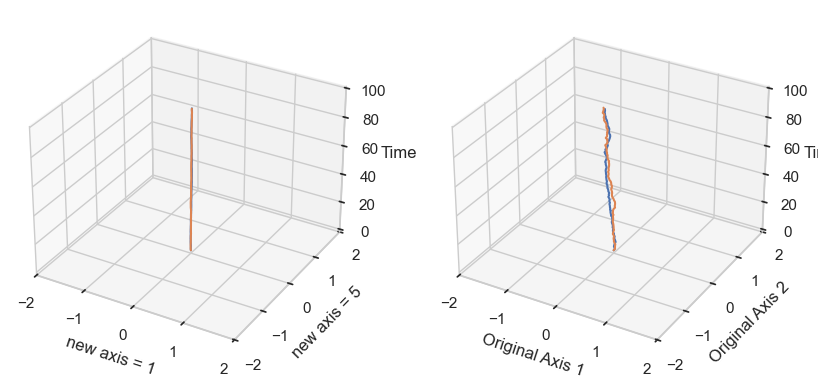

In [40]:
rotated_axis_a = 1
rotated_axis_b = 5

fig, ax = plt.subplots(1, 2, figsize=(10, 5), subplot_kw={'projection': '3d'})

# ax[0] = plt.figure().add_subplot(projection='3d')

for i in range(c):
    ax[0].plot(rotated[i, rotated_axis_a, :], rotated[i, rotated_axis_b, :], range(t))

ax[0].set_xlim([-2, 2])
ax[0].set_ylim([-2, 2])
ax[0].set_xlabel('new axis = ' + str(rotated_axis_a))
ax[0].set_ylabel('new axis = ' + str(rotated_axis_b))
ax[0].set_zlabel('Time')

# ax[1] = plt.figure().add_subplot(projection='3d')
for i in range(c):
    ax[1].plot(data[i, 0, :], data[i, 1, :], range(t))

ax[1].set_xlim([-2, 2])
ax[1].set_ylim([-2, 2])
ax[1].set_xlabel('Original Axis 1')
ax[1].set_ylabel('Original Axis 2')
ax[1].set_zlabel('Time')


Text(0.5, 0, 'Original axis 1-2')

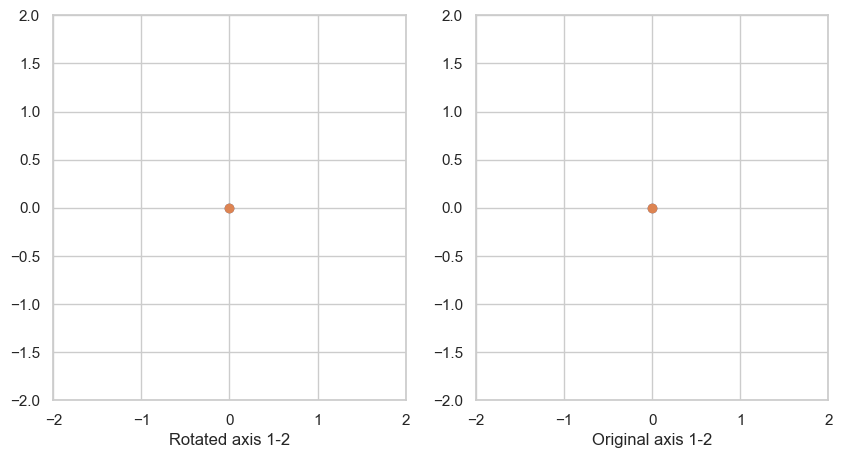

In [41]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

for i in range(c):
    ax[0].scatter(rotated[i, 0, 0], rotated[i, 1, 0])
    ax[1].scatter(data[i, 0, 0], data[i, 1, 0])

ax[0].set_xlim([-2, 2])
ax[0].set_ylim([-2, 2])
ax[0].set_xlabel('Rotated axis 1-2')

ax[1].set_xlim([-2, 2])
ax[1].set_ylim([-2, 2])
ax[1].set_xlabel('Original axis 1-2')

In [42]:
# fig, ax = plt.subplots(10, 10, figsize=(20, 20))
# fig.tight_layout(pad=2.0)


# for i in range(10):
#     for j in range(10):
#         for k in range(6):
#             if i != j:
#                 ax[i, j].scatter(rotated[k, i, 0], rotated[k, j, 0])
#                 ax[i, j].set_xlim([-2, 2])
#                 ax[i, j].set_ylim([-2, 2])
#                 ax[i, j].set_xlabel(f'Axis {i}')
#                 ax[i, j].set_ylabel(f'Axis {j}')
#             else:
#                 ax[i, j].axis('off')  # Turn off the diagonal subplots

# plt.show()

In [43]:
# fig, ax = plt.subplots(10, 1, figsize=(10, 15))
# for i in range(10):
#     for j in range(6):
#         ax[i].plot(rotated[j, i, :])
#         ax[i].plot(rotated[j, i, :])
#         ax[i].set_title(f'Axis {i}')

In [44]:
c

2

In [45]:
# sns.set(style="whitegrid")

# # Create the subplots
# fig, axes = plt.subplots(10, 1, figsize=(10, 10))  # Adjusted the height for better spacing

# # Plot the data
# for i in range(10):
#     sns.lineplot(data=rotated[0, i, :], ax=axes[i], label='Line 1')
#     sns.lineplot(data=rotated[3, i, :], ax=axes[i], label='Line 2')
#     axes[i].set_title(f'Axis {i}')

# # Adjust layout
# plt.tight_layout()
# plt.show()

In [46]:
rotated.shape

(2, 10, 100)

In [47]:
np.save('../../Data/rotated.npy', rotated)

In [48]:
def create_spiral_rotation_in_nd(c, d, t, theta, to_d):
    data = np.zeros((c, d, t))
    for i in range(c):
        data[i, :, 0] = find_coords(theta, i)

    for i in range(t):
        if i == 0:
            continue
        for j in range(c):
            data[j, :, i] = rotation_matrix(data[j, :, i - 1], 1) + np.random.normal(
                0, 0.01, (1, d)
            )

    new_data = transformation_to_n_dim(data, d, to_d)
    rotated = rotation(new_data)

    return new_data, rotated

In [53]:
new_data, new_rotation = create_spiral_rotation_in_nd(c, d, t, theta, to_d)
new_rotation.shape

rotation_multiple_simulation = []
for i in range(100):
    new_data, new_rotation = create_spiral_rotation_in_nd(c, d, t, theta, to_d)
    rotation_multiple_simulation.append(new_rotation)

rotation_multiple_simulation = np.array(rotation_multiple_simulation)
print(rotation_multiple_simulation.shape)

np.save('../../Data/rotate_multiple_simulation.npy', rotation_multiple_simulation)

(100, 2, 10, 100)


In [50]:
new_rotation[0, 0, :]

array([ 0.        , -0.0027983 , -0.00052743, -0.00115976,  0.00263302,
        0.00170065,  0.00380562,  0.00743092,  0.00033719, -0.00061574,
        0.00031185,  0.00070496,  0.00440491,  0.01178517,  0.01431398,
        0.01540547,  0.01392601,  0.01042852,  0.01492503,  0.01629363,
        0.02006897,  0.0188122 ,  0.00614224,  0.00237293,  0.00304024,
       -0.00114282, -0.00690288, -0.01425664, -0.01255794, -0.01613563,
       -0.01472055, -0.00753727, -0.0137248 , -0.00901131, -0.01155252,
       -0.01296902, -0.00797188, -0.00570961, -0.00572701,  0.00028381,
       -0.00018389,  0.00367057,  0.00765306,  0.00299959,  0.00280658,
       -0.00553949, -0.01314033, -0.01172252, -0.01525334, -0.01162131,
       -0.0183905 , -0.01267648, -0.00543396, -0.00487489, -0.00866232,
       -0.00978343, -0.01215584, -0.01534577, -0.01343793, -0.01157661,
       -0.01876234, -0.01396682, -0.01663968, -0.01116524, -0.01098357,
       -0.01029192, -0.01424758, -0.01293557, -0.01331123, -0.01

IndexError: index 2 is out of bounds for axis 0 with size 2

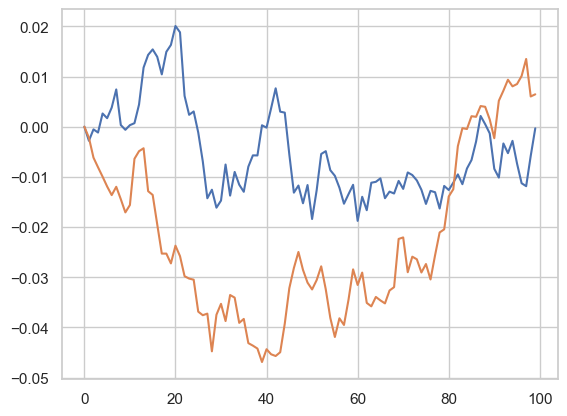

In [51]:
# plt.plot(np.arange((new_rotation.shape[2])) , new_rotation[0, 0, :])
# plt.plot(np.arange((new_rotation.shape[2])) , new_rotation[1, 0, :])
# plt.plot(np.arange((new_rotation.shape[2])) , new_rotation[2, 0, :])

In [ ]:
new_rotation.shape

(6, 10, 1000)

In [ ]:
# new_rotation

dimension_0 = new_rotation[0, :3, :]
print(dimension_0.shape)

dimension_0_T = dimension_0.T
print(dimension_0_T.shape)

from sklearn.decomposition import PCA

pca = PCA(n_components=3)

recovered_2d = pca.fit_transform(dimension_0_T).T



(3, 1000)
(1000, 3)


In [ ]:
recovered_2d.shape

(3, 1000)

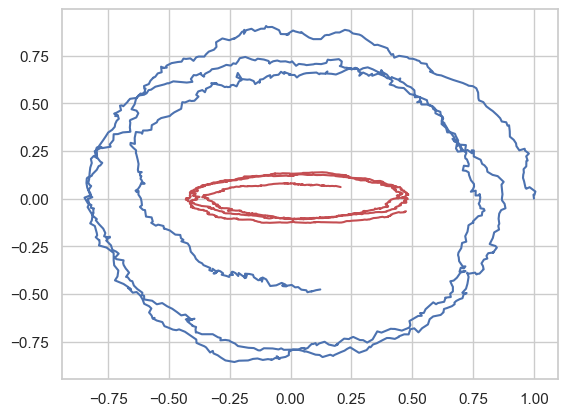

In [ ]:
plt.plot(recovered_2d[0], recovered_2d[1], 'r')
plt.plot(new_data[0, 0, :], new_data[0, 1, :], 'b')